In [78]:
import nltk as nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer, sent_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer

In [79]:
df = pd.read_csv('master_utf8.csv')
stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

df['vader'] = np.nan

In [80]:
for i in range(len(df)):
    if not df['full_text'][i].startswith('RT'):
        text = df['full_text'][i]
        words_in_tweet = TweetTokenizer().tokenize(text)
        filtered_list = [word for word in words_in_tweet if word.casefold() not in stop_words]
        df.at[i, 'vader'] = sia.polarity_scores(text)['compound']
#    else:
#        text = df['rt_full_text'][i]
#        words_in_tweet = TweetTokenizer().tokenize(text)
#        filtered_list = [word for word in words_in_tweet if word.casefold() not in stop_words]
#        df.at[i, 'vader'] = sia.polarity_scores(text)['compound']

(array([ 2129.,  3338.,  3769.,  3290.,  1893., 14869.,  3078.,  3857.,
         3185.,  1631.]),
 array([-0.9991 , -0.80105, -0.603  , -0.40495, -0.2069 , -0.00885,
         0.1892 ,  0.38725,  0.5853 ,  0.78335,  0.9814 ]),
 <BarContainer object of 10 artists>)

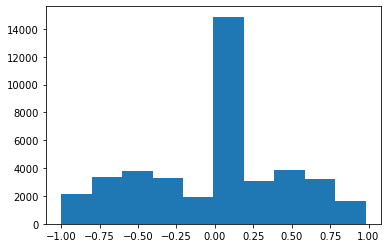

In [84]:
vaderdata = df['vader'].dropna()

plt.hist(vaderdata)

In [87]:
df.to_csv('final_vader.csv')

In [124]:
model_data = df.dropna(subset = ['vader'])

In [128]:
model_datayear_age = model_data['year_created'] - model_data['user_year_created']
model_data.insert(len(model_data.columns) - 1, "year_age", model_datayear_age)

In [146]:
from sklearn import linear_model

x = model_data['retweet_count'].values
x = x.reshape(-1, 1)
y = model_data['vader'].values

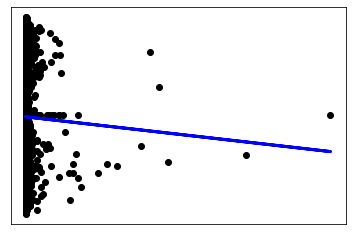

In [147]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [148]:
regr.score(x, y)

4.214853046213829e-05

In [142]:
model_data.columns

Index(['Unnamed: 0', 'created_at', 'id_str', 'full_text', 'retweet_count',
       'favorite_count', 'beginning_text', 'end_text', 'type', 'latitude',
       'longitude', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6', 'HT_7',
       'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'HT_13', 'HT_14', 'HT_15',
       'HT_16', 'HT_17', 'HT_18', 'HT_19', 'HT_20', 'HT_21', 'HT_22', 'HT_23',
       'HT_24', 'HT_25', 'HT_26', 'HT_27', 'HT_28', 'Nb. of tags',
       'user_id_str', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_verified', 'user_created_at',
       'user_followers_count', 'user_favourites_count', 'user_default_profile',
       'user_default_profile_image', 'rt_id_str', 'rt_full_text',
       'rt_retweet_count', 'rt_favourite_count', 'rt_retweet_count.1',
       'rt_favorite_count', 'rtuser_id', 'rtuser_location', 'year_created',
       'user_year_created', 'month_created', 'user_month_created',
       'day_created', 'user_day_created', 'time_created'